In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [68]:
df=pd.read_csv('wine.DATA ', header=None)

In [69]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [70]:
df.shape

(178, 14)

In [71]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


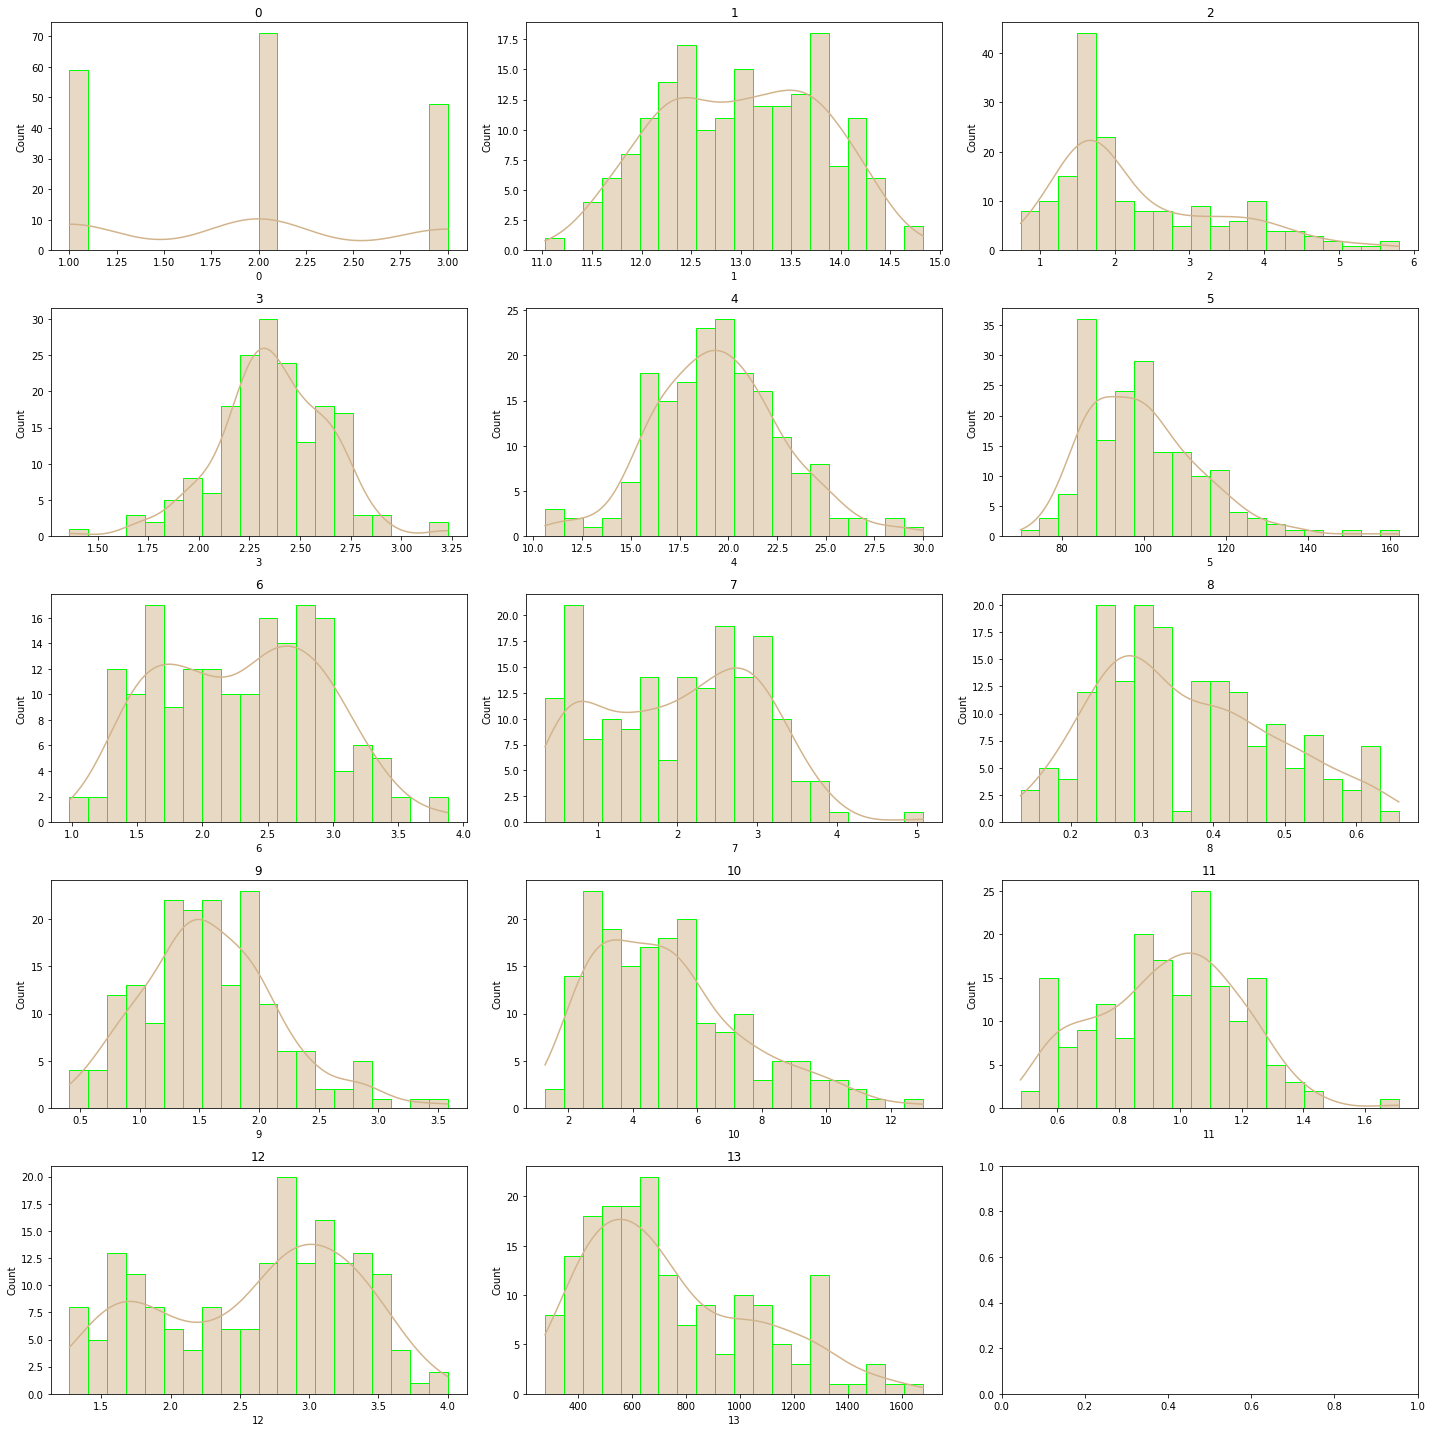

In [80]:
numerics=['int16','int32','int64','float16','float32','float64']
con_df=df.select_dtypes(include=numerics)
con_cols=con_df.columns
num_cols=3
n_bins=20
num_rows=int(len(con_cols)/num_cols)+1

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,20))

for col ,ax in zip(con_cols,axes.flatten()[:len(con_cols)]):
    sns.histplot(con_df[col],bins=n_bins,kde=True,ax=ax,color='tan',edgecolor='lime')
    ax.set_title(col)
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
X = df.drop(0,axis=1)
y=df[0]
X= pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.8,random_state=42)

# TASK2

In [9]:
from sklearn.neighbors import KNeighborsClassifier 

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [11]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
knn_model.score(X_test, y_test)

0.9444444444444444

In [13]:
y_pred= knn_model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [15]:
print(accuracy_score(y_test,y_pred))

0.9444444444444444


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



# TASK3

In [17]:
dic = {}
score_1 = []
for i in range(1,20,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    score=knn_model.score(X_test, y_test)
    score_1.append(score)
    dic.update({i:score})

MaxScore = max(zip(dic.values(), dic.keys()))[1]
print('To get the better accuracy we should consider K values =',MaxScore)

To get the better accuracy we should consider K values = 17


In [18]:
knn_model = KNeighborsClassifier(n_neighbors=17)

In [19]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [20]:
y_pred= knn_model.predict(X_test)

In [21]:
print(accuracy_score(y_test,y_pred))

0.9722222222222222


In [22]:
dic

{1: 0.9444444444444444,
 3: 0.9444444444444444,
 5: 0.9444444444444444,
 7: 0.9444444444444444,
 9: 0.9444444444444444,
 11: 0.9444444444444444,
 13: 0.9444444444444444,
 15: 0.9722222222222222,
 17: 0.9722222222222222,
 19: 0.9444444444444444}

#### Error

In [23]:
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

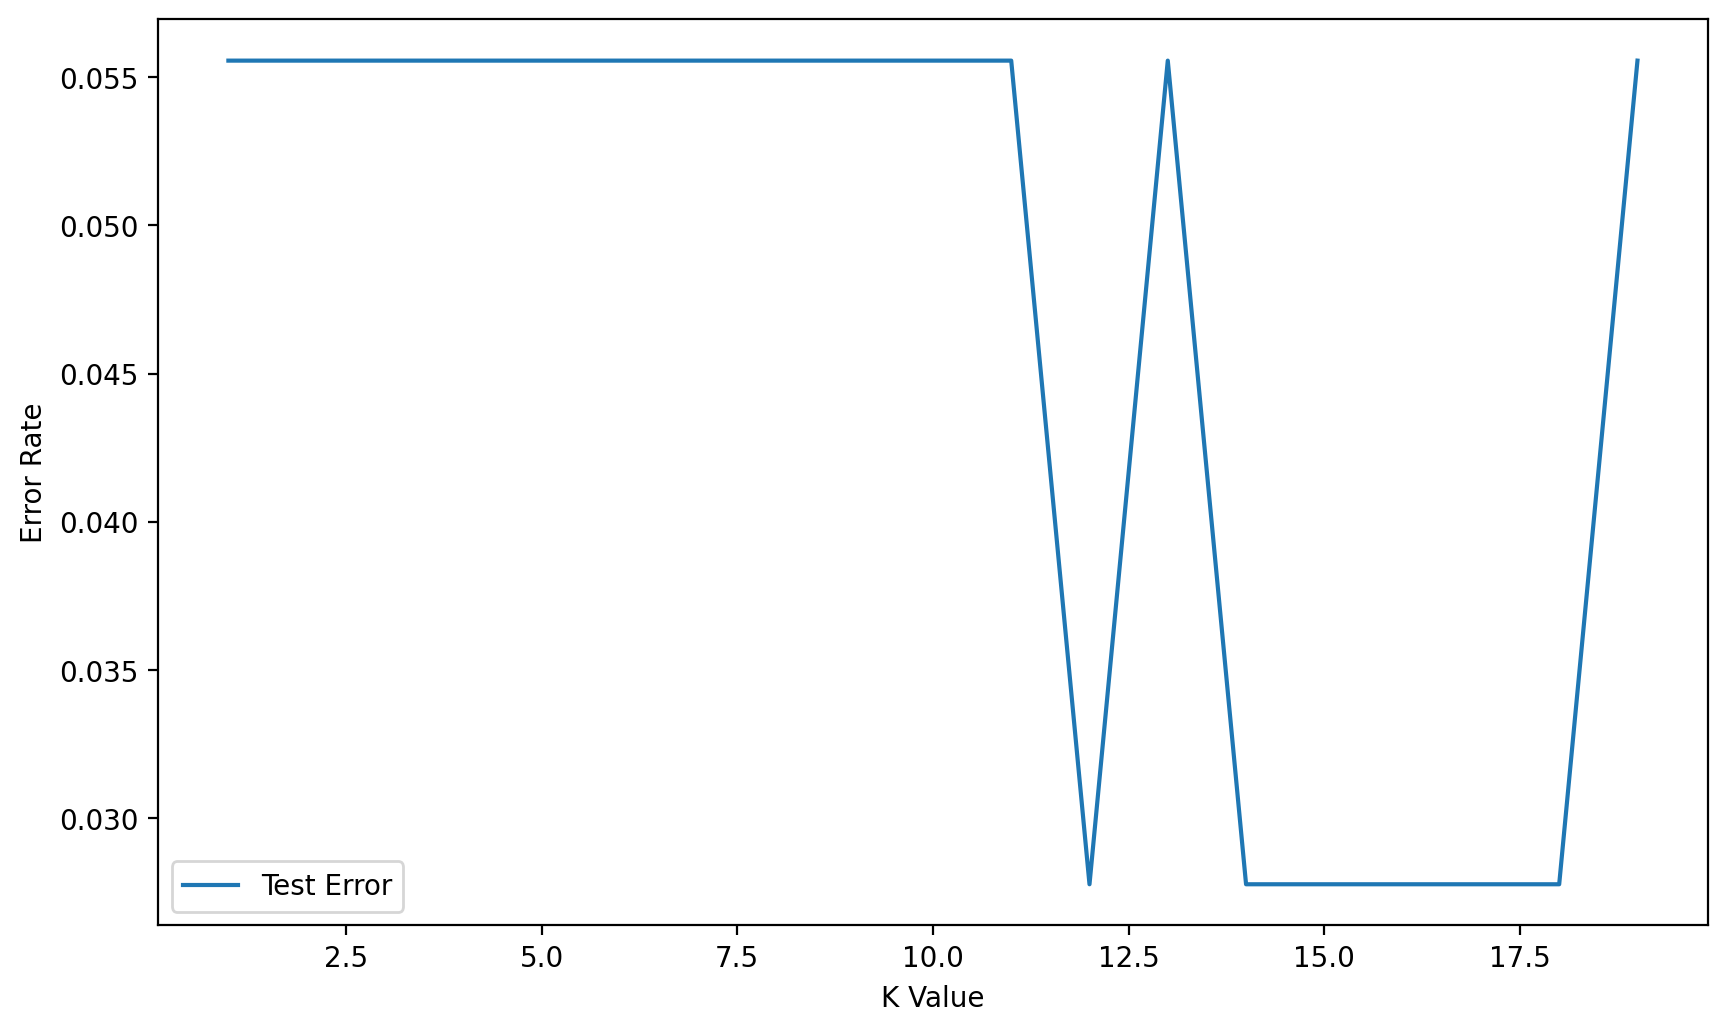

In [24]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

Text(0.5, 0, 'K Value')

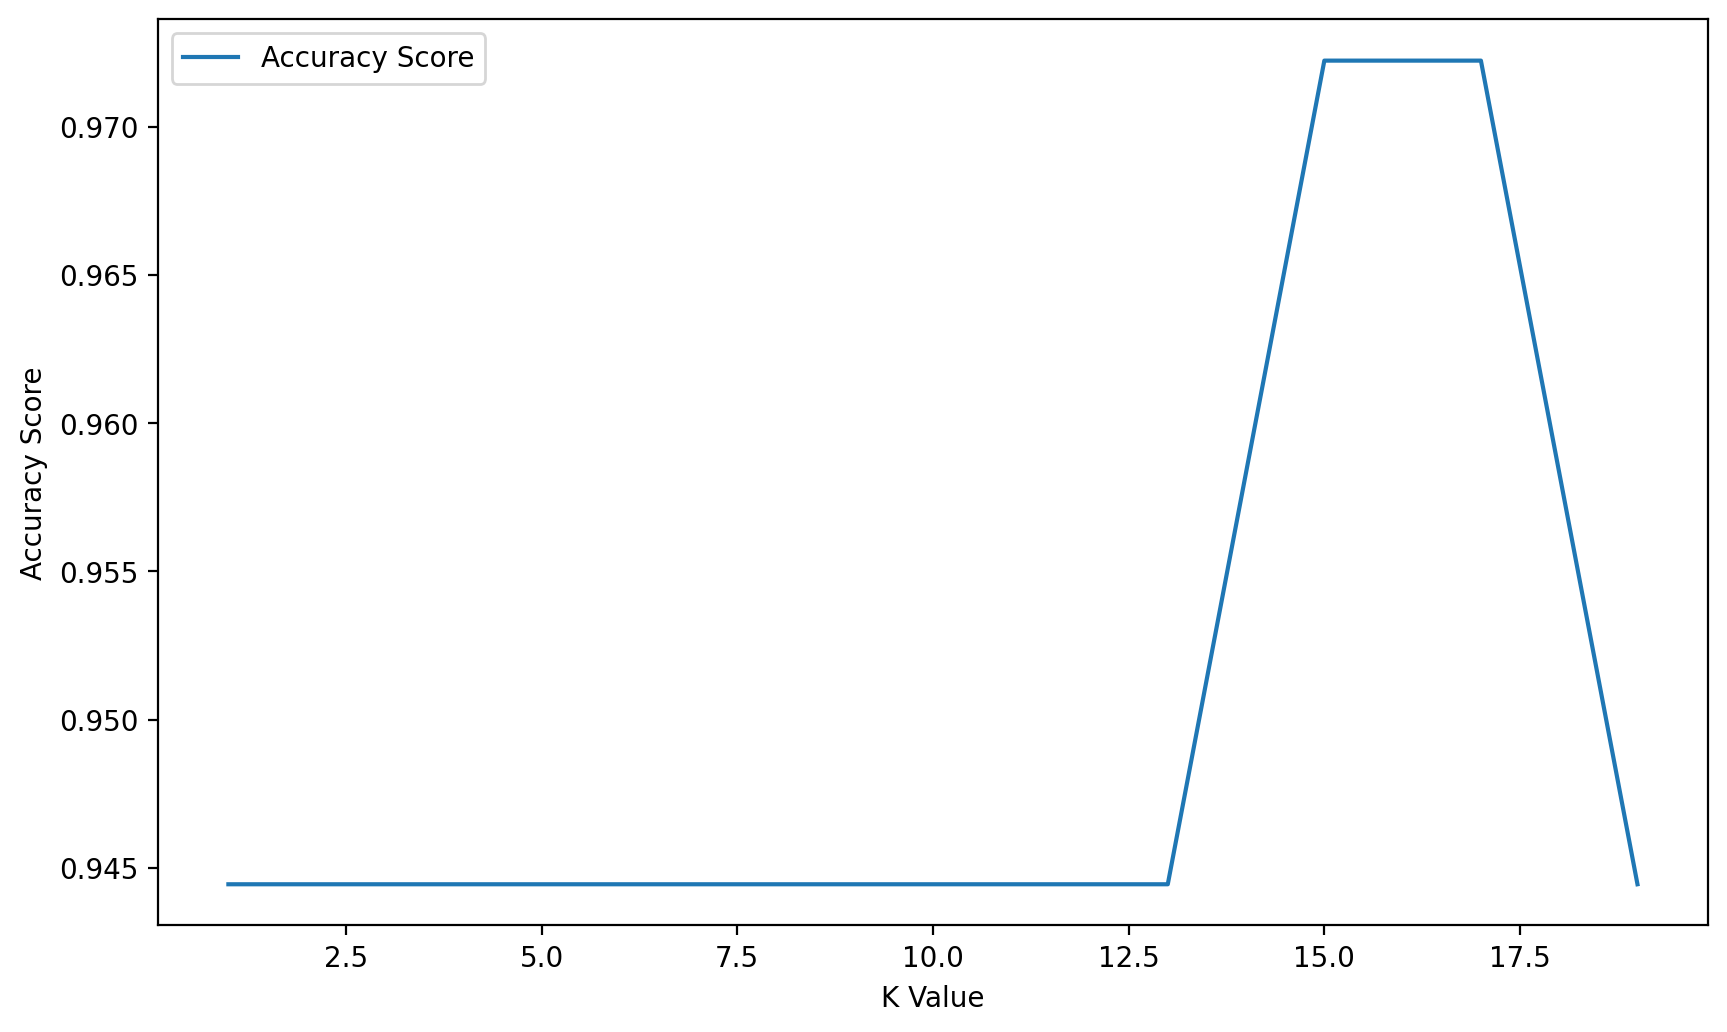

In [25]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20,2),score_1,label='Accuracy Score')
plt.legend()
plt.ylabel('Accuracy Score')
plt.xlabel("K Value")